In [1]:

import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(0)
from torch.autograd import Variable
from torchsummary import summary
import torch.optim as optim
import time
import matplotlib
from torch.utils.data import DataLoader
import torch.utils.data as data
import numpy as np
import pandas as pd
# import dat_rb_func as drb
# import write_bin_func as wbf
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision
import Deep_learning_torch_func as DL
import models_func as my_model
import torch_prepro_func as tpf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
transform_cifar_gray = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
])

In [5]:
cifar10_g = torchvision.datasets.CIFAR10(
    './', train=True, download=True,
    transform=transform_cifar_gray)
cifar10_g_v = torchvision.datasets.CIFAR10(
    './', train=False, download=True,
    transform=transform_cifar_gray)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [7]:
len(cifar10_g),len(cifar10_g[0]),cifar10_g[0][0].shape,cifar10_g[0][1]

(50000, 2, torch.Size([1, 32, 32]), 6)

In [8]:
norm_list=tpf.one_channel_norm(cifar10_g)
norm_c10_g=norm_list[0]

norm_val_list=tpf.one_channel_norm(cifar10_g_v,norm_list[1],norm_list[2])
norm_c10_g_v=norm_val_list[0]

In [9]:
l_g = torch.utils.data.DataLoader(cifar10_g,  batch_size=128,  shuffle=True)
l_g_v = torch.utils.data.DataLoader(cifar10_g_v,  batch_size=128,  shuffle=True)
norm_l_g = torch.utils.data.DataLoader(norm_c10_g,  batch_size=128,  shuffle=True)
norm_l_g_v = torch.utils.data.DataLoader(norm_c10_g_v,  batch_size=128,  shuffle=True)

In [ ]:
label_classes=10
class cifar_net_g(nn.Module):
    def __init__(self):
        super().__init__()
        self.CNN1 = nn.Sequential(
            nn.Conv2d(1, 128, kernel_size=3),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            # nn.MaxPool2d(2)
            )
        self.CNN2 = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            # nn.MaxPool2d(2)
            )
        self.CNN3 = nn.Sequential(
            nn.Conv2d(64, 32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        self.CNN4 = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        self.dropout = nn.Dropout(0.1)
        self.l1 = nn.Linear(58 * 58 * 64, 1024)
        self.l2 = nn.Linear(2048, 1024)
        self.l3 = nn.Linear(1024, 512)
        self.l4 = nn.Linear(512, 128)
        self.l5 = nn.Linear(16*5*5, 128)
        self.l6 = nn.Linear(128,64)
        self.l7 = nn.Linear(64,32)
        self.l8 = nn.Linear(128,128)
        self.fc = nn.Linear(128, label_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.CNN1(x)
        x = self.CNN2(x)
        x = self.CNN3(x)
        x = self.CNN4(x)
        x = x.view(x.size(0), -1)
        x = self.l5(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.l8(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.l8(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.l8(x)
        x = self.relu(x)
        x = self.fc(x)
        return x

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
modellist=[]
optimizerlist=[]
criterion = nn.CrossEntropyLoss()
for i in range(2):
  modeltmp=cifar_net_g()
  modeltmp=modeltmp.to(device)
  summary(modeltmp,input_size=(1,32,32))
  optimizertmp = optim.SGD(modeltmp.parameters(), lr=0.01)
  modellist.append(modeltmp)
  optimizerlist.append(optimizertmp)

エポック1 ,val_acc0.1533 ,train_acc0.15664
epochtime:0.6224565943082173分
エポック2 ,val_acc0.2012 ,train_acc0.19912
epochtime:0.5996306657791137分
エポック3 ,val_acc0.2834 ,train_acc0.2846
epochtime:0.5955573797225953分
エポック4 ,val_acc0.3214 ,train_acc0.3254
epochtime:0.6218786994616191分
エポック5 ,val_acc0.3747 ,train_acc0.3822
epochtime:0.5982591986656189分
エポック6 ,val_acc0.4265 ,train_acc0.43898
epochtime:0.5932390809059143分
エポック7 ,val_acc0.4598 ,train_acc0.47366
epochtime:0.6212456226348877分
エポック8 ,val_acc0.4971 ,train_acc0.51958
epochtime:0.6001843730608623分
エポック9 ,val_acc0.52 ,train_acc0.53842
epochtime:0.5935085256894429分
エポック10 ,val_acc0.5414 ,train_acc0.56118
epochtime:0.6233359297116597分
エポック11 ,val_acc0.5149 ,train_acc0.52994
epochtime:0.5997522632280986分
エポック12 ,val_acc0.623 ,train_acc0.6541
epochtime:0.5932732105255127分
エポック13 ,val_acc0.5948 ,train_acc0.62376
epochtime:0.6226641535758972分
エポック14 ,val_acc0.6234 ,train_acc0.6592
epochtime:0.6006218353907268分
エポック15 ,val_acc0.6278 ,train_acc0.668

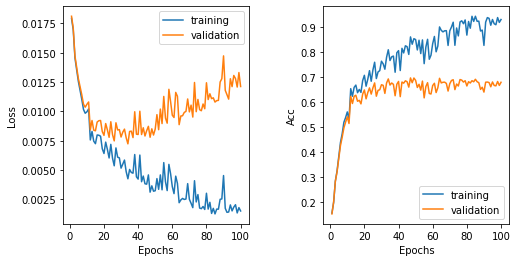

エポック1 ,val_acc0.145 ,train_acc0.14838
epochtime:0.43997358878453574分
エポック2 ,val_acc0.1731 ,train_acc0.17236
epochtime:0.41942795117696124分
エポック3 ,val_acc0.2071 ,train_acc0.20776
epochtime:0.43701794544855754分
エポック4 ,val_acc0.2817 ,train_acc0.28584
epochtime:0.4190047065416972分
エポック5 ,val_acc0.3673 ,train_acc0.37566
epochtime:0.4371110995610555分
エポック6 ,val_acc0.434 ,train_acc0.44356
epochtime:0.41953686078389485分
エポック7 ,val_acc0.4523 ,train_acc0.45608
epochtime:0.43953481912612913分
エポック8 ,val_acc0.4892 ,train_acc0.50276
epochtime:0.43834779659907025分
エポック9 ,val_acc0.5453 ,train_acc0.5594
epochtime:0.43671549956003824分
エポック10 ,val_acc0.5654 ,train_acc0.58738
epochtime:0.43676750659942626分
エポック11 ,val_acc0.5627 ,train_acc0.58352
epochtime:0.43728912274042764分
エポック12 ,val_acc0.5624 ,train_acc0.58586
epochtime:0.43697348833084104分
エポック13 ,val_acc0.6006 ,train_acc0.63026
epochtime:0.43764596780141196分
エポック14 ,val_acc0.5778 ,train_acc0.6037
epochtime:0.4384733557701111分
エポック15 ,val_acc0.5717 

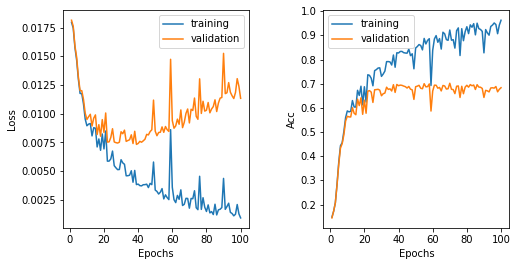

In [11]:
DL.train_model(l_g,l_g_v,modellist[0],criterion,optimizerlist[0],100,device)
DL.train_model(norm_l_g,norm_l_g_v,modellist[1],criterion,optimizerlist[1],100,device)
md_path='./drive/MyDrive/model_param/nonsim/c10_32_e100_128_0.01.pth'
torch.save(modellist[0].state_dict(), md_path)
md_path='./drive/MyDrive/model_param/nonsim/c10_norm_32_e100_128_0.01.pth'
torch.save(modellist[1].state_dict(), md_path)